# Part-A


### Data Exploration

1. Load the dataset and display the first few rows to understand its structure.
2. Summarize the dataset to check:
   - Number of rows and columns.
   - Data types of each column.
   - Presence of missing values.
3. Visualize the target class distribution to understand the balance of the dataset.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# set seed for reproducibility
import numpy as np

np.random.seed(485)

# warning ignore
import warnings

warnings.filterwarnings("ignore")


train_data = pd.read_csv("Dataset-train-vf.csv")
train_data.head()

,sample,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,1,1353,NaN,1.142857,88,104.850,0.00727,0.443,7.997,6.990,8346.00,3.9,0.032695,0.05,C1,Low
1,2,1107,NaN,4.857143,306,194.175,0.03778,0.363,34.002,12.945,376.64,11.1,0.210526,3.15,C3,Low
2,3,984,NaN,6.571429,368,208.575,0.05750,0.356,46.000,13.905,451.54,13.1,0.271930,3.10,C1,Low
3,4,1107,NaN,4.714286,297,175.725,0.03667,0.354,33.003,11.715,393.76,10.5,0.185008,2.85,C1,Low
4,5,123,NaN,33.571429,235,225.000,2.35000,0.923,235.000,15.000,5805.82,21.7,0.187400,0.40,C4,High


In [3]:
# dataset summary
print("Shape of the dataset:", train_data.shape)
print("\nDataset Info:")
print(train_data.info())
print("\nMissing Values:")
print(train_data.isnull().sum())
print("\nTarget Variable Distribution:")
print(train_data["y"].value_counts())

Shape of the dataset: (1000, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sample  1000 non-null   int64  
 1   x1      1000 non-null   int64  
 2   x2      102 non-null    float64
 3   x3      1000 non-null   float64
 4   x4      1000 non-null   int64  
 5   x5      1000 non-null   float64
 6   x6      896 non-null    float64
 7   x7      1000 non-null   float64
 8   x8      1000 non-null   float64
 9   x9      1000 non-null   float64
 10  x10     1000 non-null   float64
 11  x11     1000 non-null   float64
 12  x12     1000 non-null   float64
 13  x13     1000 non-null   float64
 14  x14     1000 non-null   object 
 15  y       1000 non-null   object 
dtypes: float64(11), int64(3), object(2)
memory usage: 125.1+ KB
None

Missing Values:
sample      0
x1          0
x2        898
x3          0
x4          0
x5          0
x6       

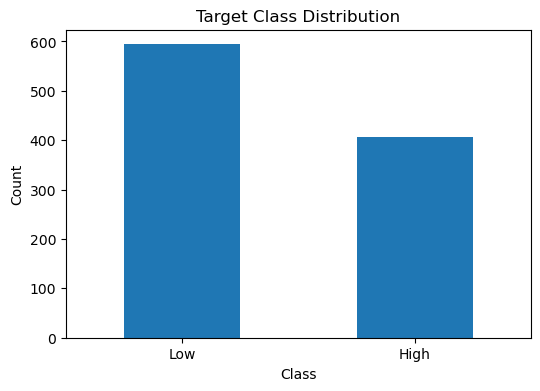

In [4]:
# Visualize target class distribution
train_data["y"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# it's kind clear that the dataset is a bit imbalanced

- show some statistics , (mean, std, min, max, etc)



Statistics of numerical features:
            sample            x1          x2           x3             x4  \
count  1000.000000   1000.000000  102.000000  1000.000000    1000.000000   
mean    500.500000   1867.632000    0.501471    11.120714    1776.068000   
std     288.819436   4961.600027    0.281419    15.435723    9674.655032   
min       1.000000    123.000000    0.010000     0.142857       7.000000   
25%     250.750000    615.000000    0.262500     2.285714      80.000000   
50%     500.500000   1107.000000    0.480000     6.142857     297.000000   
75%     750.250000   1353.000000    0.760000    13.571429     820.500000   
max    1000.000000  98892.000000    1.000000    79.000000  143993.000000   

                x5          x6           x7           x8           x9  \
count  1000.000000  896.000000  1000.000000  1000.000000  1000.000000   
mean    179.003250    0.227053     0.455955    80.843080    11.933550   
std      47.608069    0.540604     0.249991   142.154574     

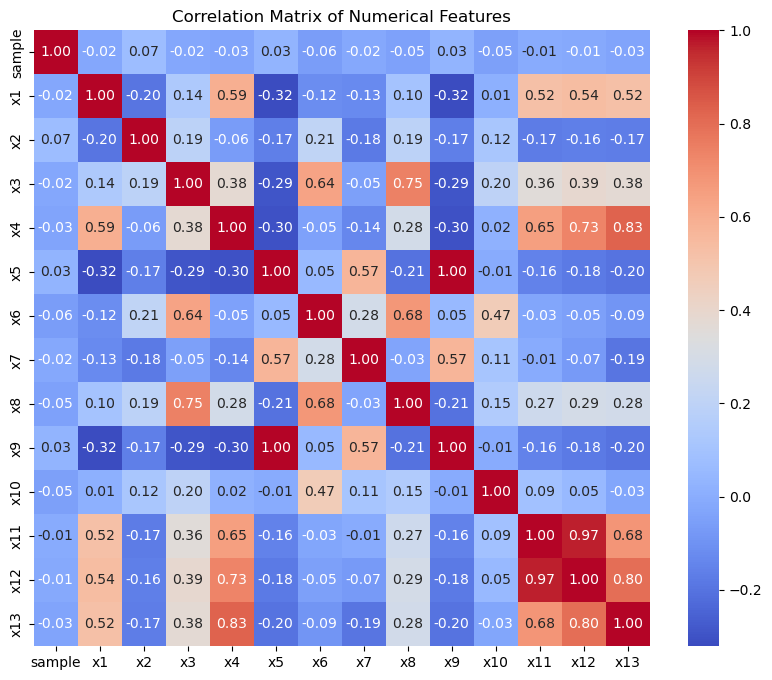

In [5]:
import seaborn as sns

print("\nStatistics of numerical features:")
print(train_data.describe())

numerical_columns = train_data.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = train_data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

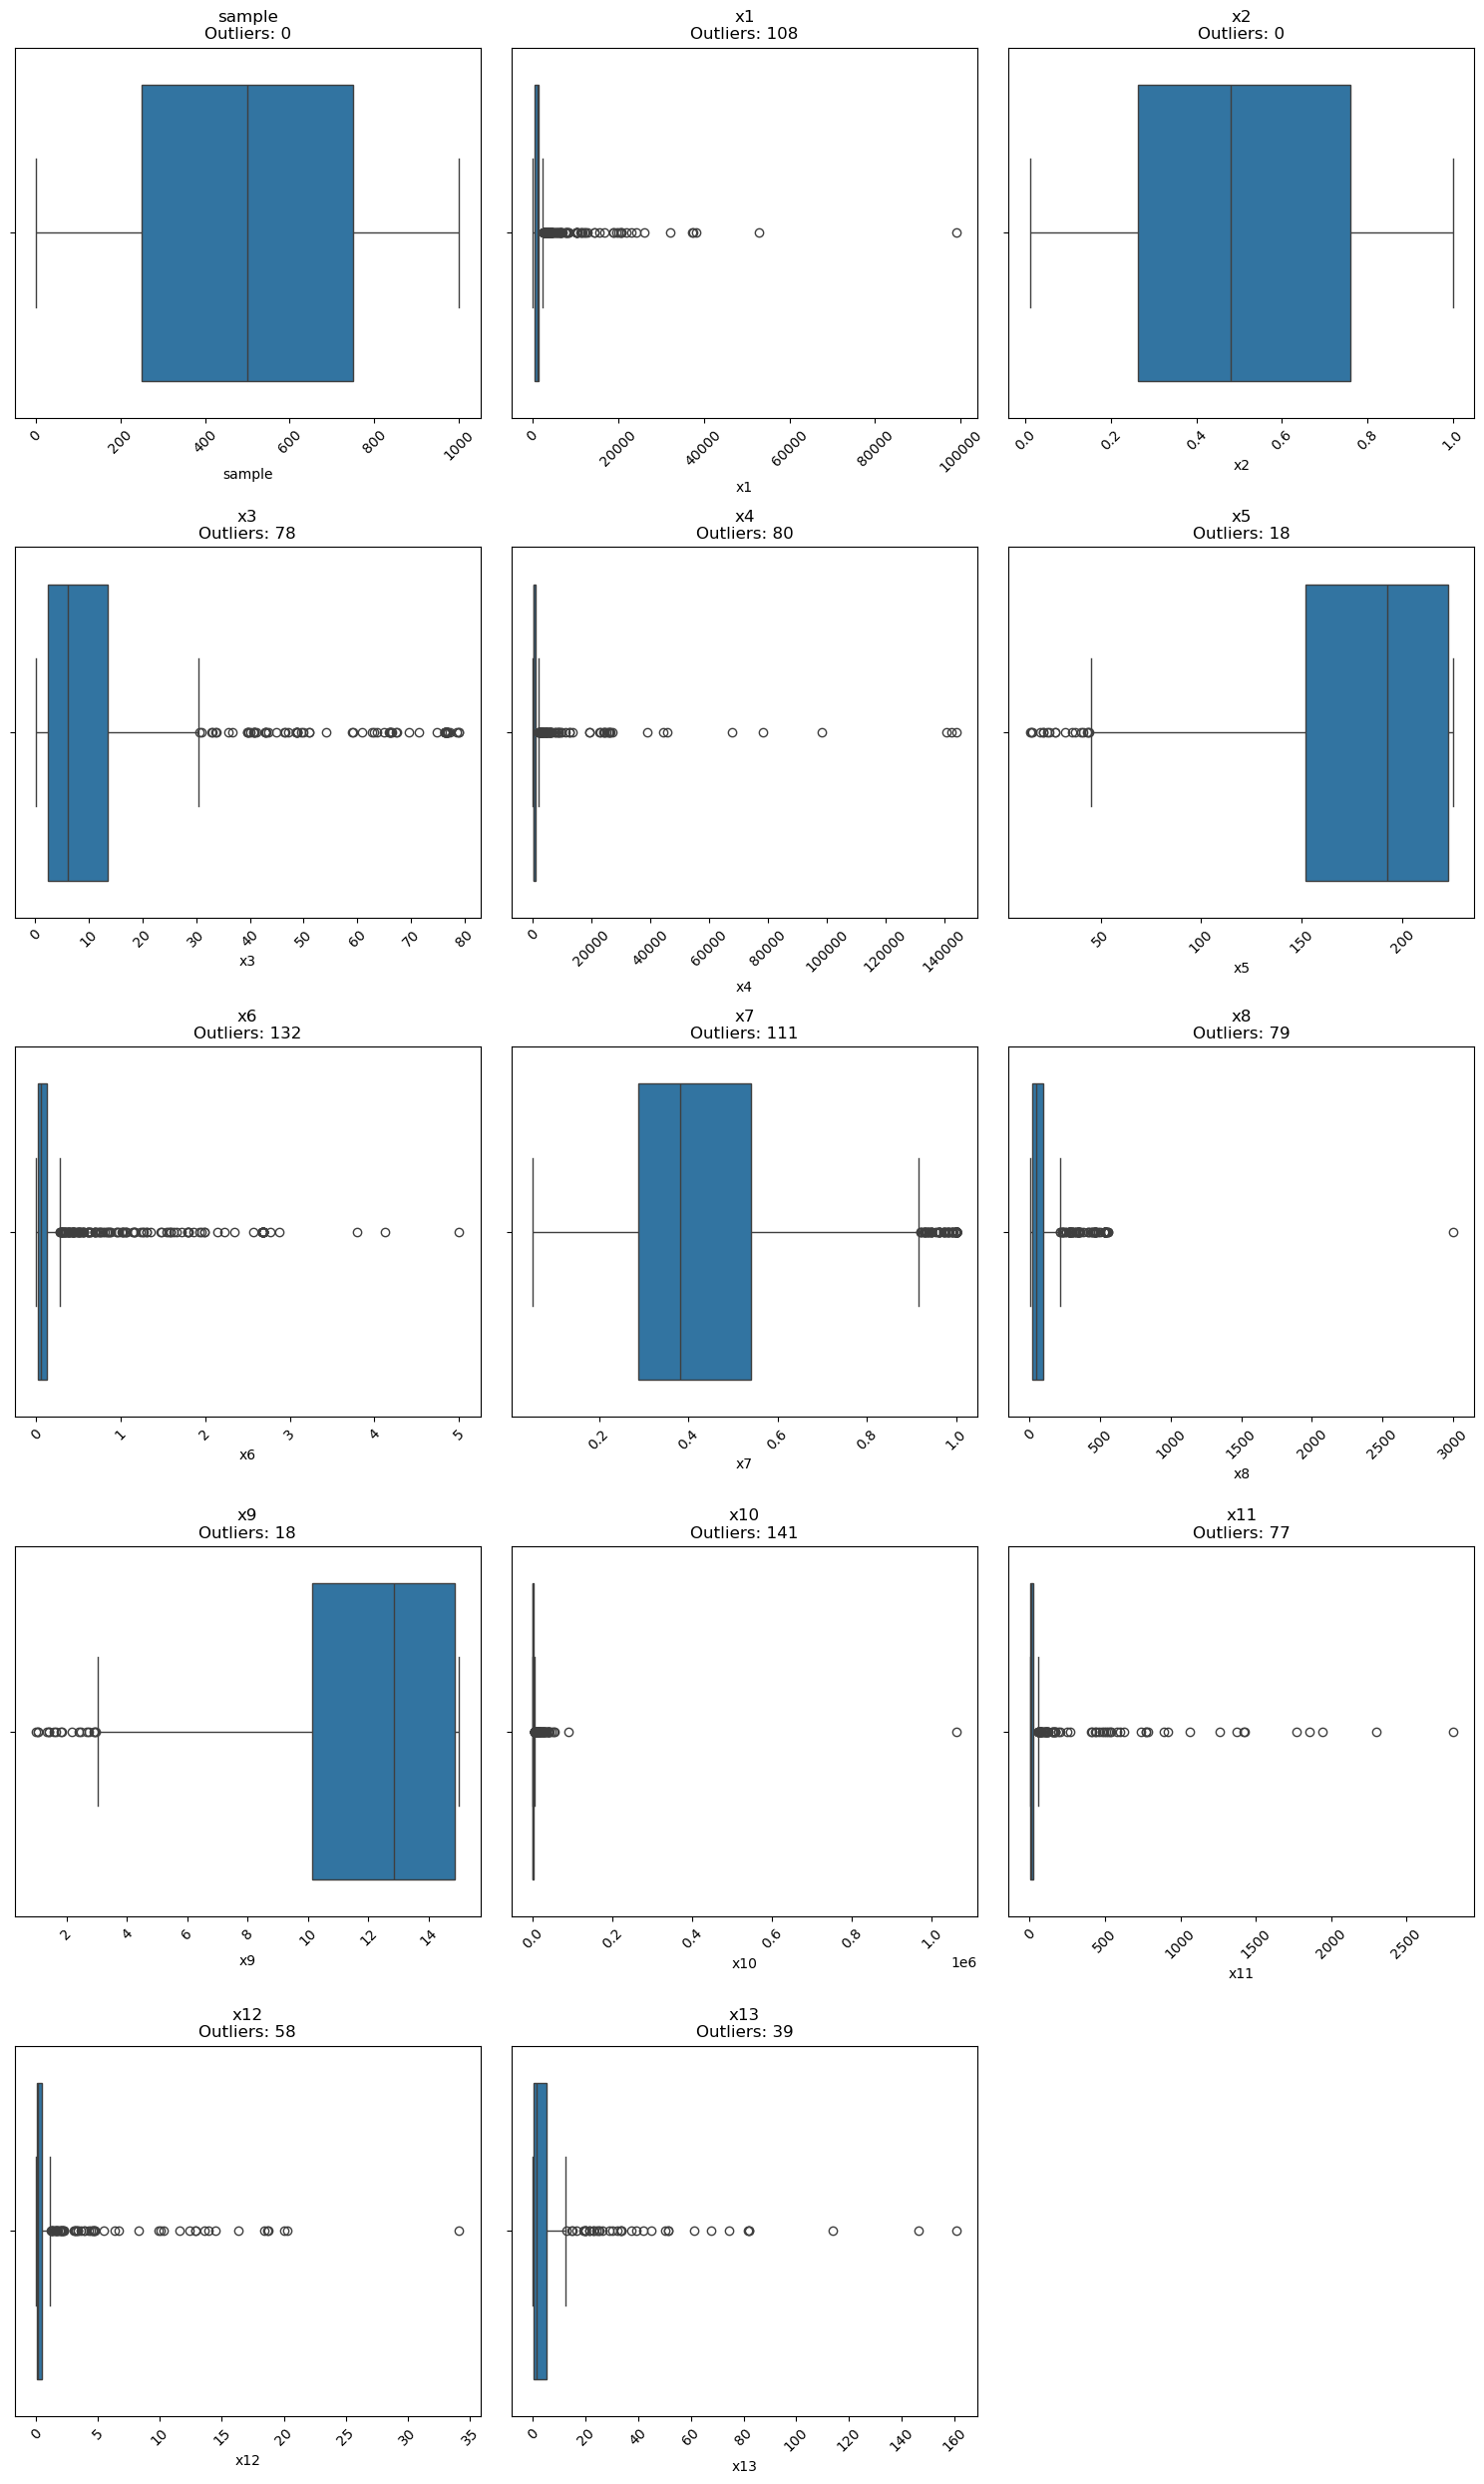


Outlier Summary:
sample: 0 outliers
x1: 108 outliers
x2: 0 outliers
x3: 78 outliers
x4: 80 outliers
x5: 18 outliers
x6: 132 outliers
x7: 111 outliers
x8: 79 outliers
x9: 18 outliers
x10: 141 outliers
x11: 77 outliers
x12: 58 outliers
x13: 39 outliers


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def detect_outliers(df, numeric_columns):
    # Set up the subplot grid
    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig = plt.figure(figsize=(15, 5 * n_rows))

    outlier_summary = {}

    for idx, col in enumerate(numeric_columns, 1):
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_summary[col] = len(outliers)

        # Create subplot
        plt.subplot(n_rows, n_cols, idx)
        sns.boxplot(x=df[col])
        plt.title(f"{col}\nOutliers: {len(outliers)}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return outlier_summary


# Get numerical columns
numeric_cols = train_data.select_dtypes(include=["float64", "int64"]).columns

# Detect and visualize outliers
outlier_counts = detect_outliers(train_data, numeric_cols)

# Print summary
print("\nOutlier Summary:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

In [21]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=["y", "sample"], axis=1)  # Remove target and sample ID
y = train_data["y"]

X_train, y_train = X, y

# We will preform a cross-validation on the training set to evaluate the model's performance
# 80% for train, 20% for validation
# X_train, X_val, y_train, y_val = train_test_split(
#    X, y, test_size=0.2, random_state=485, stratify=y
# )


# Load the test data NOTE:(We won't use it, just to process it!!)
test_data = pd.read_csv("Dataset-test-vf.csv", index_col="sample")
display(test_data.head())

X_test = test_data.drop(columns=["y"], axis=1)  # Remove target
y_test = test_data["y"]




print("Training data shape:", X_train.shape)
# print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
sample,,,,,,,,,,,,,,,
1001,984,NaN,5.428571,304,170.325,0.04750,0.349,38.000,11.355,413.02,10.6,0.183413,2.75,C4,Low
1002,861,NaN,17.571429,861,140.850,0.17571,0.265,122.997,9.390,355.24,22.8,0.429825,6.85,C4,Low
1003,984,NaN,10.142857,568,193.725,0.08875,0.310,71.000,12.915,395.90,17.6,0.389952,4.75,C3,Low
1004,123,NaN,5.142857,36,225.000,0.36000,0.306,36.000,15.000,391.62,1.1,0.028708,0.30,C4,High
1005,1107,NaN,7.285714,459,176.850,0.05667,0.296,51.003,11.790,500.76,13.6,0.287879,2.90,C4,Low


Training data shape: (1000, 14)
Test data shape: (405, 14)


### Data Preprocessing

1. Handle missing values:
   - Drop `x2` due to its high proportion of missing values.
   - Impute missing values in `x6` with its column mean.
2. Process categorical features:
   - Explore and encode `x14` if necessary.
3. Normalize numerical features to prepare them for model training.


In [22]:
# Handle missing values
X_train = X_train.drop(
    columns=["x2"], axis=1
)  # Drop 'x2' due to too many missing values, more than 80%
X_train["x6"] = X_train["x6"].fillna(X_train["x6"].mean())


#X_val = X_val.drop(columns=["x2"], axis=1)
#X_val["x6"] = X_val["x6"].fillna(X_train["x6"].mean())  # Use mean from training data


X_test = X_test.drop(columns=["x2"], axis=1)
X_test["x6"] = X_test["x6"].fillna(X_train["x6"].mean())  # Use mean from training data

print("Missing values in X_train after imputation:")
print(X_train.isnull().sum())
#print("\nMissing values in X_val after imputation:")
#print(X_val.isnull().sum())
print("\nMissing values in X_test after imputation:")
print(X_test.isnull().sum())

Missing values in X_train after imputation:
x1     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
dtype: int64

Missing values in X_test after imputation:
x1     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
dtype: int64


In [23]:
# Process categorical features

print("Unique values in x14:", train_data["x14"].unique())


X_train = pd.get_dummies(X_train, columns=["x14"], drop_first=True)
#X_val = pd.get_dummies(X_val, columns=["x14"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["x14"], drop_first=True)


#X_val = X_val.reindex(
#    columns=X_train.columns, fill_value=0
#)  # to make sure that the columns are the same in the validation set, because some categories might not be present in the validation set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # same as above


print("Dataset shape after encoding:", train_data.shape)

Unique values in x14: ['C1' 'C3' 'C4' 'C2']
Dataset shape after encoding: (1000, 16)


In [24]:
from sklearn.preprocessing import (
    RobustScaler
)  # NOTE: tried MinMaxScaler, standardscaler, but RobustScaler gave better results, maybe because of the outliers?

numerical_columns = X_train.select_dtypes(include=["float64", "int64"]).columns
scaler = RobustScaler()

# Scale numerical columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
#X_val[numerical_columns] = scaler.transform(
#    X_val[numerical_columns]
#)  # transform only, no need to fit again to avoid data leakage!
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])  # same


print("First few rows of the normalized training dataset:")
print(X_train.head())
#print("First few rows of the normalized validation dataset:")
#print(X_val.head())
print("First few rows of the normalized test dataset:")
print(X_test.head())

First few rows of the normalized training dataset:
         x1        x3        x4        x5        x6        x7        x8  \
0 -0.103775 -0.646737 -0.174571 -1.558357 -0.429737 -0.051848 -0.512699   
1 -0.153380 -0.405987 -0.152026  0.318840 -0.370081 -0.372019 -0.329673   
2 -0.178183 -0.294872 -0.145615  0.621461 -0.331523 -0.400034 -0.245230   
3 -0.153380 -0.415247 -0.152957 -0.068894 -0.372252 -0.408039 -0.336704   
4 -0.351803  1.455192 -0.159369  0.966638  4.150955  1.869182  1.084974   

         x9       x10       x11       x12       x13  x14_C2  x14_C3  x14_C4  
0 -1.558357  0.135166 -0.220630 -0.268636 -0.379805   False   False   False  
1  0.318840 -0.098963 -0.183989 -0.189301 -0.095592   False    True   False  
2  0.621461 -0.096762 -0.173811 -0.161907 -0.100176   False   False   False  
3 -0.068894 -0.098460 -0.187043 -0.200685 -0.123096   False   False   False  
4  0.966638  0.060539 -0.130046 -0.199618 -0.347717   False   False    True  
First few rows of the normaliz

### Handling Imbalanced Data

address the class imbalance in the dataset:

- We first check the class distribution in the training and test datasets.
- If the data is imbalanced, we apply **SMOTE** (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.
- SMOTE will help balance the class distribution in the training set.


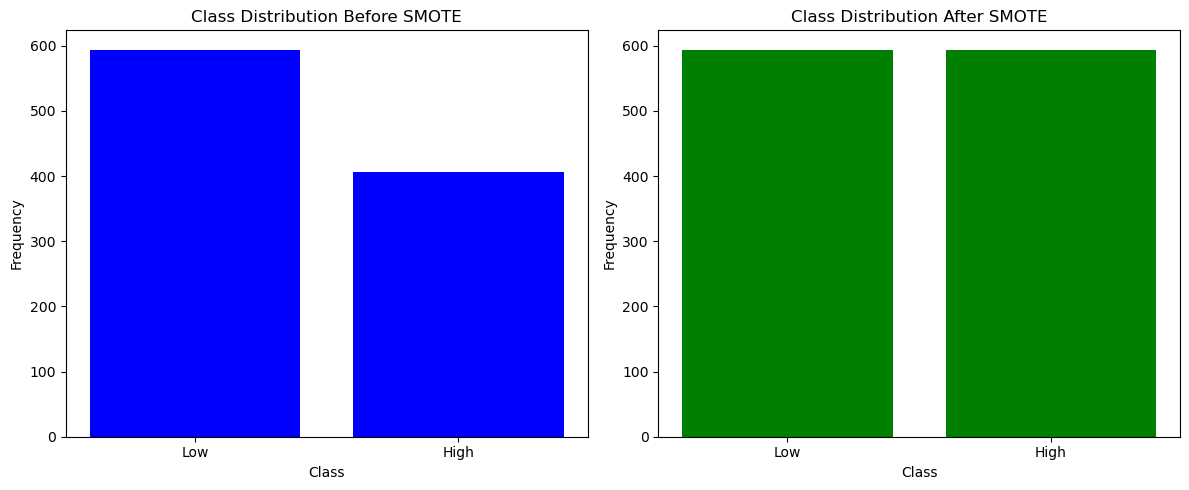

Class distribution before SMOTE:
y
Low     594
High    406
Name: count, dtype: int64

Class distribution after SMOTE:
y
Low     594
High    594
Name: count, dtype: int64
First few rows of the resampled and scaled training dataset:
         x1        x3        x4        x5        x6        x7        x8  \
0 -0.110131 -0.634992 -0.181398 -1.460456 -0.459026 -0.125978 -0.526162   
1 -0.161285 -0.405003 -0.158753  0.332666 -0.401004 -0.426568 -0.342035   
2 -0.186862 -0.298854 -0.152312  0.621734 -0.363501 -0.452870 -0.257083   
3 -0.161285 -0.413848 -0.159688 -0.037702 -0.403115 -0.460385 -0.349108   
4 -0.365901  1.372995 -0.166128  0.951452  3.996271  1.677565  1.081123   

         x9       x10       x11       x12       x13  x14_C2  x14_C3  x14_C4  
0 -1.460456  0.138186 -0.223948 -0.266817 -0.359199   False   False   False  
1  0.332666 -0.114894 -0.189124 -0.191007 -0.076568   False    True   False  
2  0.621734 -0.112516 -0.179451 -0.164831 -0.081126   False   False   False  
3 -0.0

In [25]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

train_class_distribution_before = y_train.value_counts()  # Use y_train directly

# Apply SMOTE
smote = SMOTE(random_state=485)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
train_class_distribution_after = pd.Series(y_train_resampled).value_counts()

# Plot before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(
    train_class_distribution_before.index,
    train_class_distribution_before.values,
    color="blue",
)
ax[0].set_title("Class Distribution Before SMOTE")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Frequency")

ax[1].bar(
    train_class_distribution_after.index,
    train_class_distribution_after.values,
    color="green",
)
ax[1].set_title("Class Distribution After SMOTE")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

print("Class distribution before SMOTE:")
print(train_class_distribution_before)
print("\nClass distribution after SMOTE:")
print(train_class_distribution_after)

X_train_resampled[numerical_columns] = scaler.fit_transform(
    X_train_resampled[numerical_columns]
)

print("First few rows of the resampled and scaled training dataset:")
print(X_train_resampled.head())

### Feature Selection, Transformation, and Engineering

1. Analyze the correlation between features and the target variable to identify redundant or irrelevant features.
2. Apply transformations (log, polynomial) to improve model performance.
3. Perform feature selection using Lasso Regression to identify important features.
4. Encode categorical features and normalize the numerical features if needed.


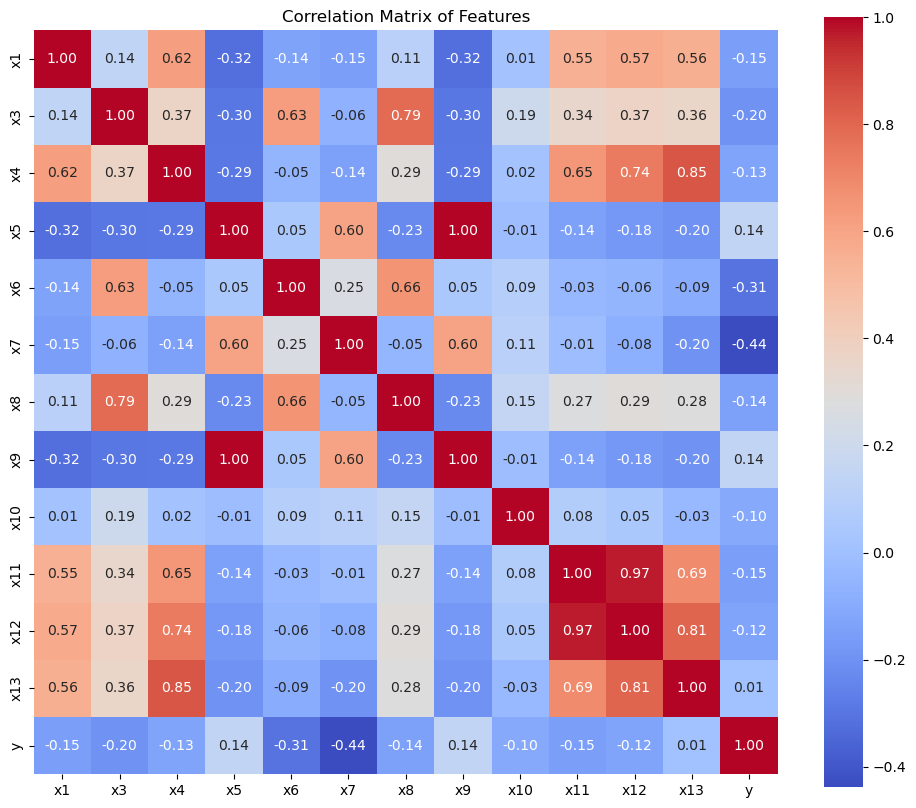

Correlation with target variable (y):
y      1.000000
x5     0.143581
x9     0.143581
x13    0.010398
x10   -0.104468
x12   -0.124561
x4    -0.128243
x8    -0.141162
x1    -0.149702
x11   -0.150319
x3    -0.198661
x6    -0.308864
x7    -0.438511
Name: y, dtype: float64
Best Alpha (Regularization Strength): 0.0010912397456383646
Selected Features after Lasso Regression:
Index(['x1', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14_C3', 'x14_C4'],
      dtype='object')
Final Training Dataset (Selected Features):
         x1        x3        x4        x5        x6        x7        x8  \
0 -0.110131 -0.634992 -0.181398 -1.460456 -0.459026 -0.125978 -0.526162   
1 -0.161285 -0.405003 -0.158753  0.332666 -0.401004 -0.426568 -0.342035   
2 -0.186862 -0.298854 -0.152312  0.621734 -0.363501 -0.452870 -0.257083   
3 -0.161285 -0.413848 -0.159688 -0.037702 -0.403115 -0.460385 -0.349108   
4 -0.365901  1.372995 -0.166128  0.951452  3.996271  1.677565  1.081123   



In [26]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


train_data_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_data_resampled["y"] = y_train_resampled

label_encoder = LabelEncoder()
train_data_resampled["y"] = label_encoder.fit_transform(
    train_data_resampled["y"]
)  # High=1, Low=0

# transfrom y_test
y_test = label_encoder.transform(y_test)

y_train_resampled = train_data_resampled["y"]

numerical_columns = list(
    train_data_resampled.select_dtypes(include=["float64", "int64"]).columns
)

if "y" not in numerical_columns:
    numerical_columns.append("y")
correlation_matrix = train_data_resampled[numerical_columns].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features")
plt.show()

correlation_with_target = correlation_matrix["y"].sort_values(ascending=False)
print("Correlation with target variable (y):")
print(correlation_with_target)

# Transformations (Log Transformation) #NOTE: we tried this, but it didn't improve the model performance
# for col in train_data_resampled.columns:
#    if train_data_resampled[col].skew() > 1:  # Check for skewness
#        train_data_resampled[col] = np.log1p(train_data_resampled[col])
#        if col in X_val.columns:
#            X_val[col] = np.log1p(X_val[col])
#        if col in X_test.columns:
#            X_test[col] = np.log1p(X_test[col])

# Lasso Regression for Feature Selection
X = train_data_resampled.drop(["y"], axis=1)
y = train_data_resampled["y"]
lasso = LassoCV(cv=5, random_state=485)
lasso.fit(X, y)

best_alpha = lasso.alpha_
print(f"Best Alpha (Regularization Strength): {best_alpha}")

coefficients = pd.Series(lasso.coef_, index=X.columns)
selected_features = coefficients[coefficients != 0].index
print(f"Selected Features after Lasso Regression:\n{selected_features}")

# Keep only the selected features in the datasets
X_train_selected = train_data_resampled[selected_features]
# X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Normalize the selected features #NOTE: no need to for now.
#  no need to scale again assuming the log transformation is not necessary
# scaler = MinMaxScaler()
# X_train_selected = scaler.fit_transform(X_train_selected)
# X_val_selected = scaler.transform(X_val_selected)
# X_test_selected = scaler.transform(X_test_selected)


X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
# X_val_selected = pd.DataFrame(X_val_selected, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)


print("Final Training Dataset (Selected Features):")
print(X_train_selected.head())
# print("Final Validation Dataset (Selected Features):")
# print(X_val_selected.head())
print("Final Test Dataset (Selected Features):")
print(X_test_selected.head())

### Model Selection and Training

1. Select classifiers:
   - **Logistic Regression** .
   - **Decision Trees** .
   - **Neural Networks**
   - **Random Forest**
2. Train each model on the training data.
3. Evaluate the models using metrics like accuracy, precision, recall, and F1-score.


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# won't fine-tune the hyperparameters, just to compare the plain models and check

logistic_regression = LogisticRegression(random_state=485, max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=485)
random_forest = RandomForestClassifier(random_state=485, n_estimators=100)
neural_network = MLPClassifier(random_state=485, max_iter=500)

models = {
    "Logistic Regression": logistic_regression,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Neural Network": neural_network,
}

# Train models
# splitting the data into train and validation sets for evaluation here only!
X_train_nofinetune, X_val_nofinetune, y_train_nofinetune, y_val_nofinetune = (
    train_test_split(
        X_train_selected,
        y_train_resampled,
        test_size=0.3,
        random_state=485,
        stratify=y_train_resampled,
    )
)
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_nofinetune, y_train_nofinetune)
    y_pred = model.predict(X_val_nofinetune)

    # Evaluation metrics
    accuracy = accuracy_score(y_val_nofinetune, y_pred)
    class_report = classification_report(y_val_nofinetune, y_pred)

    roc_auc = roc_auc_score(
        y_val_nofinetune, model.predict_proba(X_val_nofinetune)[:, 1]
    )

    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "ROC-AUC": roc_auc,
    }

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Classification Report:\n{class_report}")

Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.8936
ROC-AUC Score: 0.9509
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       179
           1       0.88      0.90      0.89       178

    accuracy                           0.89       357
   macro avg       0.89      0.89      0.89       357
weighted avg       0.89      0.89      0.89       357

Training Decision Tree...

Decision Tree Results:
Accuracy: 0.9356
ROC-AUC Score: 0.9355
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       179
           1       0.96      0.91      0.93       178

    accuracy                           0.94       357
   macro avg       0.94      0.94      0.94       357
weighted avg       0.94      0.94      0.94       357

Training Random Forest...

Random Forest Results:
Accuracy: 0.9608
ROC-AUC Score: 0.9903
Classification Report

### Comparison of Models: Logistic Regression, Decision Tree, Neural Networks, and Random Forest
- In terms of accuarcy, Both **Neural Networks** and **Random Forest** achieve the highest accuracy.
- **Random Forest** slightly outperform **Neural Networks** in accuracy and F1-scores, making it the best-performing model overall.
erall.



### Hyperparameter Tuning with Cross-Validation Random Forest

1. Use **GridSearchCV** to tune the hyperparameters for **Random Forest**.
2. Perform **3-fold cross-validation** to evaluate the best model and get a more reliable performance estimate.



In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
}

# NOTE: we will preform a cross-validation on the training set to evaluate the model's performance
rf = RandomForestClassifier(random_state=485)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="roc_auc",  # NOTE: we used AUC for scoring because of the probabilsitic nature of random forest, and the imbalanced dataset, we can use Gmean. NOTE: we tried Gmean, but AUC gave better results
    cv=3,
    n_jobs=-1,
    verbose=2,
    refit=True,
)


grid_search_rf.fit(X_train_selected, y_train_resampled)
best_params = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_
print(f"Best Hyperparameters: {best_params}")


cv_scores = cross_val_score(
    best_rf, X_train_selected, y_train_resampled, cv=3, scoring="roc_auc", n_jobs=-1
)
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation AUC: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation AUC: {cv_scores.std():.4f}")

# Accuracy
accuracy_scores = cross_val_score(
    best_rf, X_train_selected, y_train_resampled, cv=3, scoring="accuracy", n_jobs=-1
)
print(f"Cross-validation Accuracy Scores: {accuracy_scores}")
print(f"Mean Cross-validation Accuracy: {accuracy_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {accuracy_scores.std():.4f}")

#f1
f1_scores = cross_val_score(
    best_rf, X_train_selected, y_train_resampled, cv=3, scoring="f1", n_jobs=-1
)
print(f"Cross-validation F1 Scores: {f1_scores}")
print(f"Mean Cross-validation F1: {f1_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation F1: {f1_scores.std():.4f}")

### Hyperparameter Tuning with Cross-Validation for Neural Networks

1. Tune the **Neural Networks** model using **GridSearchCV**.
   - Tune the number of neurons (**hidden_layer_sizes**), regularization strength (**alpha**), and initial learning rate (**learning_rate_init**).
2. Perform **3-fold cross-validation** to evaluate the best combination of hyperparameters.



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

param_grid_nn = {
    "hidden_layer_sizes": [
        (50,),
        (100,),
        (100, 50),
        (150, 100, 50),
    ],  # Number of neurons in hidden layers
    "alpha": [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    "learning_rate_init": [0.001, 0.01, 0.1],  # Initial learning rate
    "max_iter": [200, 300, 500],  # Number of iterations
    "activation": ["relu", "tanh"],  # Activation functions
}


mlp = MLPClassifier(random_state=485)
grid_search_nn = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_nn,
    scoring="roc_auc",  # Use AUC for scoring
    cv=3,
    n_jobs=-1,
    verbose=2,
    refit=True,
)

grid_search_nn.fit(X_train_selected, y_train_resampled)

# Get the best parameters and best model
best_params_nn = grid_search_nn.best_params_
best_nn = grid_search_nn.best_estimator_
print(f"Best Hyperparameters for Neural Networks: {best_params_nn}")
cv_scores_nn = cross_val_score(
    best_nn, X_train_selected, y_train_resampled, cv=3, scoring="roc_auc", n_jobs=-1
)
print(f"Cross-validation Scores: {cv_scores_nn}")
print(f"Mean Cross-validation AUC: {cv_scores_nn.mean():.4f}")
print(f"Standard Deviation of Cross-validation AUC: {cv_scores_nn.std():.4f}")

# Accuracy
accuracy_scores = cross_val_score(
    best_nn, X_train_selected, y_train_resampled, cv=3, scoring="accuracy", n_jobs=-1
)
print(f"Cross-validation Accuracy Scores: {accuracy_scores}")
print(f"Mean Cross-validation Accuracy: {accuracy_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {accuracy_scores.std():.4f}")

#f1
f1_scores = cross_val_score(
    best_nn, X_train_selected, y_train_resampled, cv=3, scoring="f1", n_jobs=-1
)
print(f"Cross-validation F1 Scores: {f1_scores}")
print(f"Mean Cross-validation F1: {f1_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation F1: {f1_scores.std():.4f}")


### Hyperparameter Tuning with Cross-Validation for Decision Trees

1. Tune the **Decision Tree** model using **GridSearchCV**.
   - Tune **max_depth**, **min_samples_split**, **min_samples_leaf**, and **max_features**.
2. Perform **3-fold cross-validation** to evaluate the best combination of hyperparameters.



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


param_grid_dt = {
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"],
}


dt = DecisionTreeClassifier(random_state=485)
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring="roc_auc",  # Use AUC for scoring
    cv=3,
    n_jobs=-1,
    verbose=2,
    refit=True,
)

grid_search_dt.fit(X_train_selected, y_train_resampled)

# Get the best parameters and best model
best_params_dt = grid_search_dt.best_params_
best_dt = grid_search_dt.best_estimator_
print(f"Best Hyperparameters for Decision Tree: {best_params_dt}")


cv_scores_dt = cross_val_score(
    best_dt, X_train_selected, y_train_resampled, cv=3, scoring="roc_auc", n_jobs=-1
)

print(f"Cross-validation Scores: {cv_scores_dt}")
print(f"Mean Cross-validation AUC: {cv_scores_dt.mean():.4f}")
print(f"Standard Deviation of Cross-validation AUC: {cv_scores_dt.std():.4f}")

# Accuracy
accuracy_scores = cross_val_score(
    best_dt, X_train_selected, y_train_resampled, cv=3, scoring="accuracy", n_jobs=-1
)
print(f"Cross-validation Accuracy Scores: {accuracy_scores}")
print(f"Mean Cross-validation Accuracy: {accuracy_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {accuracy_scores.std():.4f}")

#f1
f1_scores = cross_val_score(
    best_dt, X_train_selected, y_train_resampled, cv=3, scoring="f1", n_jobs=-1
)
print(f"Cross-validation F1 Scores: {f1_scores}")
print(f"Mean Cross-validation F1: {f1_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation F1: {f1_scores.std():.4f}")

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0

### Hyperparameter Tuning with Cross-Validation for Logistic Regression

1. Tune the **Logistic Regression** model using **GridSearchCV**.
2. Perform **3-fold cross-validation** to evaluate the best combination of hyperparameters.



In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


param_grid_lr = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"],
    "max_iter": [100, 200, 500],
}

lr = LogisticRegression(random_state=485)
grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring="roc_auc",  # Use AUC for scoring
    cv=3,
    n_jobs=-1,
    verbose=2,
    refit=True,
)

grid_search_lr.fit(X_train_selected, y_train_resampled)
best_params_lr = grid_search_lr.best_params_
best_lr = grid_search_lr.best_estimator_
print(f"Best Hyperparameters for Logistic Regression: {best_params_lr}")

# Perform cross-validation with the best model
cv_scores_lr = cross_val_score(
    best_lr, X_train_selected, y_train_resampled, cv=3, scoring="roc_auc", n_jobs=-1
)
print(f"Cross-validation Scores: {cv_scores_lr}")
print(f"Mean Cross-validation AUC: {cv_scores_lr.mean():.4f}")
print(f"Standard Deviation of Cross-validation AUC: {cv_scores_lr.std():.4f}")

# Accuracy
accuracy_scores = cross_val_score(
    best_lr, X_train_selected, y_train_resampled, cv=3, scoring="accuracy", n_jobs=-1
)
print(f"Cross-validation Accuracy Scores: {accuracy_scores}")
print(f"Mean Cross-validation Accuracy: {accuracy_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {accuracy_scores.std():.4f}")

#f1
f1_scores = cross_val_score(
    best_lr, X_train_selected, y_train_resampled, cv=3, scoring="f1", n_jobs=-1
)
print(f"Cross-validation F1 Scores: {f1_scores}")
print(f"Mean Cross-validation F1: {f1_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation F1: {f1_scores.std():.4f}")

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penal

/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/sit

[CV] END .........C=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=10, max_iter=100, penalty=None, solver=saga; total time=   0.0s
[CV] END .......C=1, max_iter=200, penalty=None, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=10, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .....C=0.1, max_iter=500, penalty=None, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ....

/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-pa

[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=100, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=None, solver=liblinear; total time=   0.0s
[CV] EN

/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohammed/miniconda3/lib/python3.10/site-

### Computing GMean for All Models and Evaluation on test set




In [32]:
from sklearn.metrics import confusion_matrix


# Function to compute Sensitivity, Specificity, and GMean
# NOTE: WHY? because the dataset is imbalanced, gmean is a better metric to evaluate the models
def compute_gmean(y_true, y_pred):
    # Ensure labels are consistent
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate Sensitivity and Specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Compute GMean
    gmean = np.sqrt(sensitivity * specificity)

    return gmean


# for each model, compute the classification report, roc_auc, and gmean on the test set
models = {
    "Logistic Regression": grid_search_lr,
    "Neural Network": grid_search_nn,
    "Decision Tree": grid_search_dt,
    "Random Forest": grid_search_rf,
}
gmeans = {}

for model_name, grid_search in models.items():
    y_pred_lr = grid_search.best_estimator_.predict(X_test_selected)
    print(f"{model_name}, Results:")
    print("-" * 50)
    print("Classification Report:")
    print(classification_report(y_test, y_pred_lr))
    print(
        "ROC-AUC Score:",
        roc_auc_score(
            y_test, grid_search.best_estimator_.predict_proba(X_test_selected)[:, 1]
        ),
    )

    X_test_lr = X_test.reindex(  ## get the colmun names from the best model
        columns=grid_search.best_estimator_.feature_names_in_, fill_value=0
    )

    gmean = compute_gmean(y_test, y_pred_lr)
    print(f"G-Mean: {gmean:.4f}")
    gmeans[model_name] = gmean
    print("\n")
    print("-" * 50)

Logistic Regression, Results:
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       153
           1       0.93      0.87      0.90       252

    accuracy                           0.88       405
   macro avg       0.87      0.88      0.87       405
weighted avg       0.88      0.88      0.88       405

ROC-AUC Score: 0.9548578690735554
G-Mean: 0.8801


--------------------------------------------------
Neural Network, Results:
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       153
           1       0.96      0.95      0.96       252

    accuracy                           0.95       405
   macro avg       0.94      0.95      0.95       405
weighted avg       0.95      0.95      0.95       405

ROC-AUC Score: 0.9899237472766884
G-Mean:

In [33]:
# final results on the test set, sort based on Gmean
gmean_results = {
    "Model": [
        "Logistic Regression",
        "Neural Networks",
        "Decision Tree",
        "Random Forest",
    ],
    "GMean": [gmeans[model] for model in gmeans],  # NOTE: same order
}

gmean_df = pd.DataFrame(gmean_results).sort_values(by="GMean", ascending=False)
print("GMean Results:")
print(gmean_df)

# Highlight the best model
best_model = gmean_df.iloc[0]
print(f"\nBest Model: {best_model['Model']} with GMean = {best_model['GMean']:.4f}")

GMean Results:
                 Model     GMean
1      Neural Networks  0.946762
3        Random Forest  0.942782
0  Logistic Regression  0.880121
2        Decision Tree  0.347393

Best Model: Neural Networks with GMean = 0.9468


In [34]:
#

### Error Analysis for Improvements

1. Analyze the confusion matrix to identify false positives and false negatives.
2. Review feature importance to understand the model's decisions.
3. Investigate misclassified examples to detect patterns or weaknesses.
4. Compare training vs. test performance to check for overfitting or underfitting.
5. Suggest improvements based on the findings.



--- Logistic Regression ---


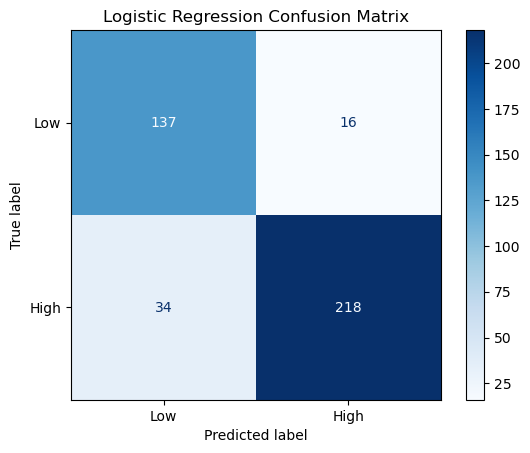

Number of Misclassified Examples: 50
Examples of Misclassified Samples:
              x1        x3        x4        x5        x6        x7        x8  \
sample                                                                         
1014   -0.153380 -0.285612 -0.139927 -0.272217  0.000000 -0.680184 -0.238206   
1020   -0.103775 -0.155978 -0.114280 -0.858545 -0.335532 -0.380024 -0.139693   
1031   -0.103775 -0.396728 -0.143857 -1.000399 -0.381735 -0.484079 -0.322635   
1039   -0.252592 -0.646737 -0.179535 -1.515801 -0.412667 -0.323994 -0.512678   
1057   -0.078972 -0.313391 -0.129068 -0.253303  0.000000 -0.648167 -0.259278   

              x9       x10       x11       x12       x13  x14_C3  x14_C4  
sample                                                                    
1014   -0.272217 -0.097768 -0.178900 -0.172224 -0.100176   False    True  
1020   -0.858545 -0.078341 -0.117324 -0.136648 -0.164353   False   False  
1031   -1.000399 -0.079976 -0.174829 -0.203176 -0.260619    True   

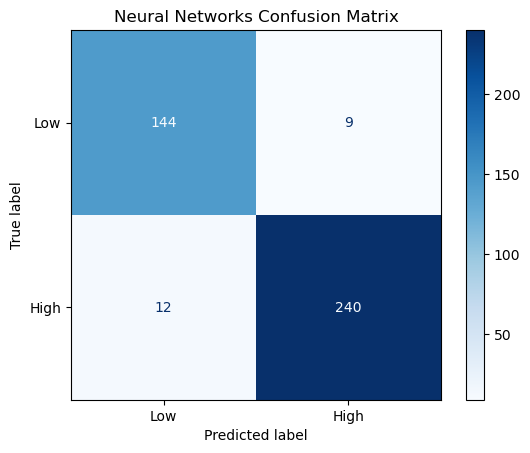

Number of Misclassified Examples: 21
Examples of Misclassified Samples:
              x1        x3        x4        x5        x6        x7        x8  \
sample                                                                         
1069   -0.327000 -0.591179 -0.180776  0.120245 -0.307082 -0.680184 -0.470449   
1070   -0.202986 -0.507843 -0.167022 -1.208451 -0.379701 -1.452598 -0.407092   
1076   -0.302197 -0.202276 -0.166298 -1.397589 -0.078960 -1.564658 -0.174841   
1077   -0.327000 -0.665256 -0.182430  0.966638 -0.385294  0.844633 -0.526754   
1093   -0.351803 -0.637477 -0.182741  0.966638 -0.267977  1.288871 -0.505640   

              x9       x10       x11       x12       x13  x14_C3  x14_C4  
sample                                                                    
1069    0.120245 -0.059732 -0.236406 -0.275039 -0.379805   False   False  
1070   -1.208451 -0.101477 -0.232843 -0.252271 -0.333964    True   False  
1076   -1.397589 -0.101352 -0.234879 -0.253338 -0.347717   False   

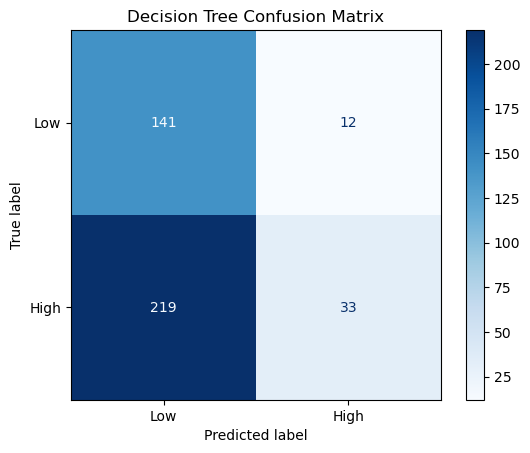

Number of Misclassified Examples: 231
Examples of Misclassified Samples:
              x1        x3        x4        x5        x6        x7        x8  \
sample                                                                         
1001   -0.178183 -0.368949 -0.152233 -0.182376 -0.351076 -0.428049 -0.301535   
1002   -0.202986  0.418117 -0.094631 -0.801804 -0.100390 -0.764229  0.296684   
1003   -0.178183 -0.063382 -0.124932  0.309383 -0.270421 -0.584133 -0.069277   
1005   -0.153380 -0.248574 -0.136204 -0.045251 -0.333146 -0.640163 -0.210018   
1007   -0.103775  0.381079 -0.048302 -0.229661 -0.232430 -0.880292  0.268539   

              x9       x10       x11       x12       x13  x14_C3  x14_C4  
sample                                                                    
1001   -0.182376 -0.097894 -0.186534 -0.201397 -0.132265   False    True  
1002   -0.801804 -0.099591 -0.124448 -0.091467  0.243630   False    True  
1003    0.309383 -0.098397 -0.150911 -0.109255  0.051099    True  

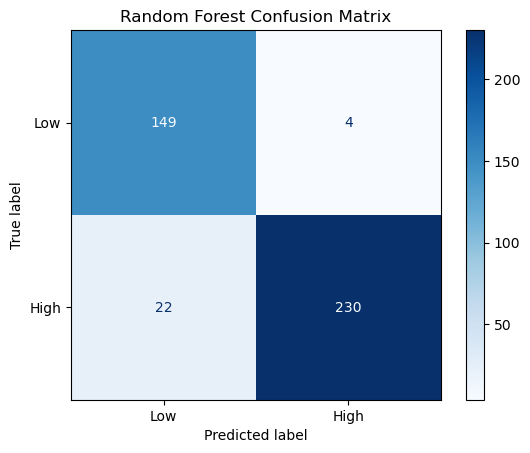

Number of Misclassified Examples: 26
Examples of Misclassified Samples:
              x1        x3        x4        x5        x6        x7        x8  \
sample                                                                         
1020   -0.103775 -0.155978 -0.114280 -0.858545 -0.335532 -0.380024 -0.139693   
1059   -0.202986 -0.294872 -0.150372 -0.986214 -0.315470 -1.204465 -0.245251   
1070   -0.202986 -0.507843 -0.167022 -1.208451 -0.379701 -1.452598 -0.407092   
1076   -0.302197 -0.202276 -0.166298 -1.397589 -0.078960 -1.564658 -0.174841   
1082   -0.302197 -0.572660 -0.178707  0.673474 -0.339677 -0.323994 -0.456380   

              x9       x10       x11       x12       x13  x14_C3  x14_C4  
sample                                                                    
1020   -0.858545 -0.078341 -0.117324 -0.136648 -0.164353   False   False  
1059   -0.986214 -0.083811 -0.215032 -0.215983 -0.329380   False    True  
1070   -1.208451 -0.101477 -0.232843 -0.252271 -0.333964    True   

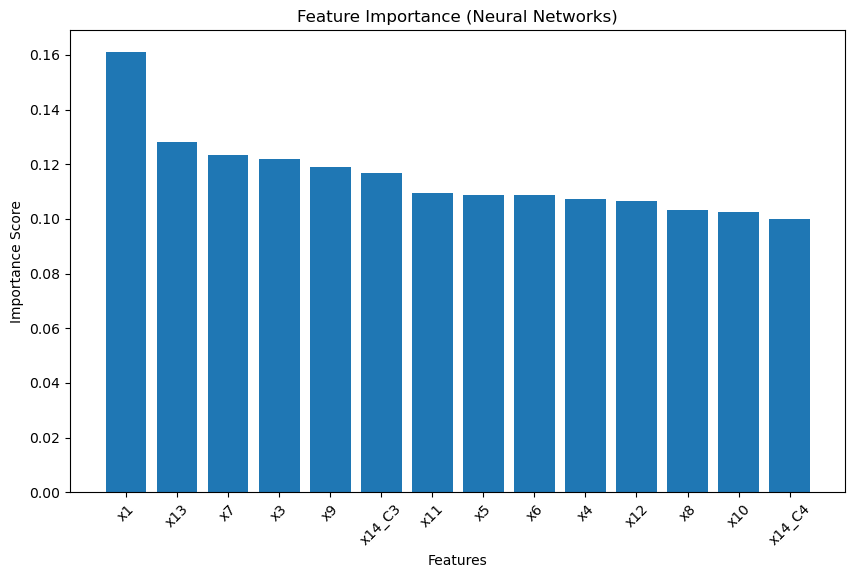


--- Training vs. Test Performance ---
Neural Networks Training Accuracy: 0.9857
Neural Networks Test Accuracy: 0.9481
Training and test performance are well-aligned for Neural Networks.


In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Function to analyze misclassified examples
def analyze_misclassifications(y_true, y_pred, X_test):
    misclassified = X_test[(y_true != y_pred)]
    print(f"Number of Misclassified Examples: {len(misclassified)}")
    print("Examples of Misclassified Samples:")
    print(misclassified.head())
    return misclassified


# Analyze confusion matrix for each model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(title)
    plt.show()


print("\n--- Logistic Regression ---")
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test_selected)
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
misclassified_lr = analyze_misclassifications(y_test, y_pred_lr, X_test_selected)

print("\n--- Neural Networks ---")
y_pred_mlp = grid_search_nn.best_estimator_.predict(X_test_selected)
plot_confusion_matrix(y_test, y_pred_mlp, "Neural Networks Confusion Matrix")
misclassified_mlp = analyze_misclassifications(y_test, y_pred_mlp, X_test_selected)

print("\n--- Decision Tree ---")
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test_selected)
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
misclassified_dt = analyze_misclassifications(y_test, y_pred_dt, X_test_selected)

print("\n--- Random Forest ---")
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_selected)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
misclassified_rf = analyze_misclassifications(y_test, y_pred_rf, X_test_selected)


# Extract weights from the first layer of the Neural Network
input_layer_weights = grid_search_nn.best_estimator_.coefs_[0]

# Compute the absolute mean of weights for each feature
feature_importance_mlp = np.mean(np.abs(input_layer_weights), axis=1)

# Map feature importance to feature names
feature_importance_df = pd.DataFrame(
    {
        "Feature": grid_search_nn.best_estimator_.feature_names_in_,
        "Importance": feature_importance_mlp,
    }
).sort_values(by="Importance", ascending=False)

print("\n--- Neural Networks Feature Importance ---")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.title("Feature Importance (Neural Networks)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()


print("\n--- Training vs. Test Performance ---")
X_train_consistent = X_train_selected.reindex(
    columns=grid_search_nn.best_estimator_.feature_names_in_, fill_value=0
)
# Training performance
y_train_pred_mlp = grid_search_nn.best_estimator_.predict(X_train_consistent)
train_accuracy_mlp = accuracy_score(y_train_resampled, y_train_pred_mlp)
print(f"Neural Networks Training Accuracy: {train_accuracy_mlp:.4f}")

# Test performance
X_test_consistent = X_test_selected.reindex(
    columns=grid_search_nn.best_estimator_.feature_names_in_, fill_value=0
)
y_pred_mlp = grid_search_nn.best_estimator_.predict(X_test_consistent)
test_accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Neural Networks Test Accuracy: {test_accuracy_mlp:.4f}")

if train_accuracy_mlp - test_accuracy_mlp > 0.05:
    print("*Maybe* overfitting detected for Neural Networks.")
elif test_accuracy_mlp - train_accuracy_mlp > 0.05:
    print("*Maybe* underfitting detected for Neural Networks.")
else:
    print("Training and test performance are well-aligned for Neural Networks.")